# 乳癌資料庫預測SVM分類
>使用scikit-learn 機器學習套件裡的SVR演算法

* (一)引入函式庫及內建乳癌資料集<br>
引入之函式庫如下<br>
sklearn.datasets: 用來匯入內建之乳癌資料集`datasets.load_breast_cancer()`<br>
sklearn.SVR: 支持向量機回歸分析之演算法<br>
matplotlib.pyplot: 用來繪製影像

In [1]:
from sklearn import svm
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

## Step1. 下載資料

In [2]:
breast_cancer=datasets.load_breast_cancer()
data = breast_cancer.data
target = breast_cancer.target

print('feature name:',breast_cancer.feature_names)
print('target name:',breast_cancer.target_names)

feature name: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
target name: ['malignant' 'benign']


In [3]:
feature = data[:,[6,20]]
print(breast_cancer.feature_names[6])
print(breast_cancer.feature_names[20])

mean concavity
worst radius


In [4]:
malignant = feature[target==0,:]
benign = feature[target==1,:]

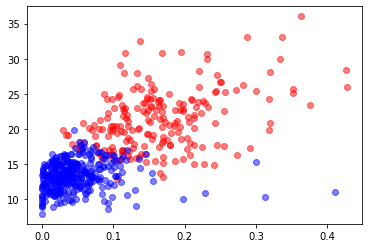

In [5]:
plt.scatter(malignant[:,0],malignant[:,1],color='red',alpha=0.5)
plt.scatter(benign[:,0],benign[:,1],color='blue',alpha=0.5)

## Step2. 區分訓練集與測試集

In [6]:
x_train, x_test, y_train, y_test = train_test_split(feature, target,test_size=0.3,random_state=100)

## Step3. 建模

In [7]:
svc = svm.SVC(kernel='poly',gamma=1,C=10)
svc.fit(x_train,y_train)

SVC(C=10, gamma=1, kernel='poly')

## Step4. 預測

In [8]:
svc.predict(x_test)

array([0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1])

## Step5. 準確度分析

In [9]:
print(svc.score(x_train,y_train))
print(svc.score(x_test, y_test))

0.9447236180904522
0.9415204678362573


# Practice

In [10]:
from sklearn.model_selection import GridSearchCV

C = [1,10]
gamma = [1,10]
kernel = ['linear','poly','rbf']
paragrid = {'C':C,'kernel':kernel,'gamma':gamma}

GS = GridSearchCV(svm.SVC(),paragrid,verbose=3)
GS.fit(x_train,y_train)
print('Best Parameter:',GS.best_params_)
print('Best Score:',GS.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END .......C=1, gamma=1, kernel=linear;, score=0.950 total time=   0.0s
[CV 2/5] END .......C=1, gamma=1, kernel=linear;, score=0.900 total time=   0.0s
[CV 3/5] END .......C=1, gamma=1, kernel=linear;, score=0.912 total time=   0.0s
[CV 4/5] END .......C=1, gamma=1, kernel=linear;, score=0.937 total time=   0.0s
[CV 5/5] END .......C=1, gamma=1, kernel=linear;, score=0.886 total time=   0.0s
[CV 1/5] END .........C=1, gamma=1, kernel=poly;, score=0.975 total time=   1.7s
[CV 2/5] END .........C=1, gamma=1, kernel=poly;, score=0.887 total time=   3.5s
[CV 3/5] END .........C=1, gamma=1, kernel=poly;, score=0.950 total time=   6.8s
[CV 4/5] END .........C=1, gamma=1, kernel=poly;, score=0.949 total time=   5.3s
[CV 5/5] END .........C=1, gamma=1, kernel=poly;, score=0.949 total time=   4.9s
[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.938 total time=   0.0s
[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;

In [11]:
x_train, x_test, y_train, y_test = train_test_split(data, target,test_size=0.3,random_state=100)

svc = svm.SVC(kernel='linear',gamma=10,C=10)
svc.fit(x_train,y_train)

print(svc.score(x_train,y_train))
print(svc.score(x_test, y_test))

0.9698492462311558
0.9590643274853801
